In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Datasets are automatically created during inference , check '../../inference/'

amd_csv = './amd_cpu_eval.csv' 
jetson_csv = './jetson_cuda_eval.csv'
pi_csv = './pi5_eval.csv'

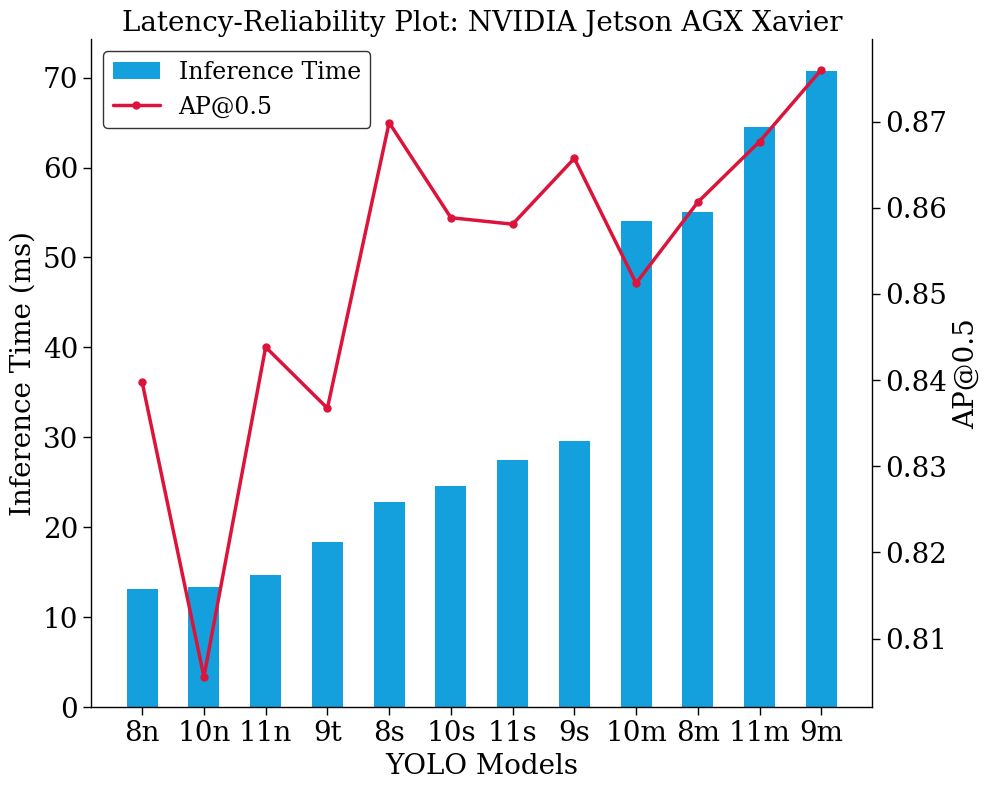

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_latency_reliability_tradeoff(csv_path: str):
    """
    Creates a dual-axis plot with a bar chart for inference time (left y-axis)
    and a line chart for AP@0.5 (right y-axis). The bars are sorted in
    increasing order of inference time.

    Args:
        csv_path (str): The file path to the evaluation CSV.
    """
    # --- 1. Style Configuration ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif'],
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 17,
        'figure.figsize': (10, 8),
        'axes.edgecolor': 'black',
        'axes.linewidth': 1.0,        
        'xtick.color': 'black',       
        'ytick.color': 'black',       
        'axes.labelcolor': 'black',   
        'text.color': 'black',        
        'legend.edgecolor': 'black'
    })

    # --- 2. Data Loading & Preparation ---
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"file was not found at '{csv_path}'.")
        return

    required_cols = ['model', 'inference_time', 'AP@0.5']
    if not all(col in df.columns for col in required_cols):
        print(f"CSV must contain the columns: {required_cols}.")
        if 'AP@0.5' not in df.columns and 'f1_score' in df.columns:
            print("⚠️ Warning: 'AP@0.5' not found. Using 'f1_score' as a substitute for the accuracy metric.")
            df.rename(columns={'f1_score': 'AP@0.5'}, inplace=True)
        else:
            return

    df = df.sort_values(by='inference_time').reset_index(drop=True)
    
    # --- 3. Plotting ---
    fig, ax1 = plt.subplots()
    
    # Define colors
    bar_color = "#14a0dc"  # Blue
    line_color = '#DC143C' # Red

    x_indices = np.arange(len(df))
    bar_width = 0.5

    ax2 = ax1.twinx()
    ax2.set_ylabel('AP@0.5')
    ax2.tick_params(axis='both', direction='out', length=6, width=1)
    line = ax2.plot(x_indices, df['AP@0.5'], color=line_color, marker='o', markersize=5, linewidth=2.5, label='AP@0.5')

    ax1.set_xlabel('YOLO Models')
    ax1.set_ylabel('Inference Time (ms)')
    ax1.grid(False)
    bars = ax1.bar(x_indices, df['inference_time'], width=bar_width, color=bar_color, label='Inference Time')

    
    ax1.set_title('Latency-Reliability Plot: NVIDIA Jetson AGX Xavier')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax2.spines['top'].set_visible(False)
    # ax2.spines['right'].set_visible(False)

    ax2.set_axisbelow(True)
    ax2.grid(False)

    ax1.set_xticks(x_indices)
    ax1.set_xticklabels(df['model'].str.lstrip('y'))
    ax1.tick_params(axis='both', direction='out', length=6, width=1)
    plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles + handles2, labels + labels2, loc='upper left', frameon=True)

    fig.tight_layout()
    plt.savefig("reliability_jetson.pdf", bbox_inches='tight')
    plt.show()


jetson_file = "./jetson_cuda_eval.csv"
plot_latency_reliability_tradeoff(csv_path=jetson_file)

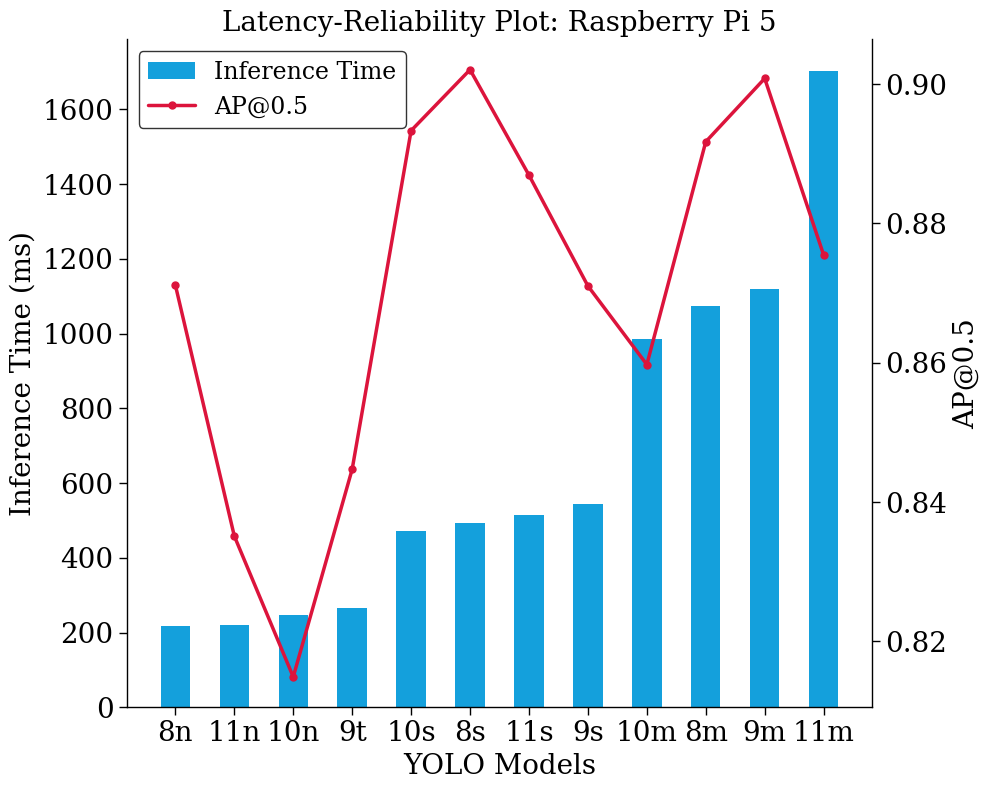

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_latency_reliability_tradeoff(csv_path: str):
    """
    Creates a dual-axis plot with a bar chart for inference time (left y-axis)
    and a line chart for AP@0.5 (right y-axis). The bars are sorted in
    increasing order of inference time.

    Args:
        csv_path (str): The file path to the evaluation CSV.
    """
    # --- 1. Style Configuration ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif'],
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 17,
        'figure.figsize': (10, 8),
        'axes.edgecolor': 'black',    
        'axes.linewidth': 1.0,        
        'xtick.color': 'black',       
        'ytick.color': 'black',       
        'axes.labelcolor': 'black',   
        'text.color': 'black',
        'legend.edgecolor': 'black'   
    })

    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f" file not found at '{csv_path}'.")
        return

    required_cols = ['model', 'inference_time', 'AP@0.5']
    if not all(col in df.columns for col in required_cols):
        print(f"The CSV must contain the columns: {required_cols}.")
        if 'AP@0.5' not in df.columns and 'f1_score' in df.columns:
            print("Warning: 'AP@0.5' not found. Using 'f1_score' as a substitute for the accuracy metric.")
            df.rename(columns={'f1_score': 'AP@0.5'}, inplace=True)
        else:
            return

    df = df.sort_values(by='inference_time').reset_index(drop=True)
    
    fig, ax1 = plt.subplots()
    
    bar_color = '#14a0dc' 
    line_color = '#DC143C'

    x_indices = np.arange(len(df))
    bar_width = 0.5

    ax2 = ax1.twinx()
    ax2.set_ylabel('AP@0.5')
    ax2.tick_params(axis='both', direction='out', length=6, width=1)
    line = ax2.plot(x_indices, df['AP@0.5'], color=line_color, marker='o', markersize=5, linewidth=2.5, label='AP@0.5')

    ax1.set_xlabel('YOLO Models')
    ax1.set_ylabel('Inference Time (ms)')
    ax1.grid(False)
    bars = ax1.bar(x_indices, df['inference_time'], width=bar_width, color=bar_color, label='Inference Time')


    ax1.set_title('Latency-Reliability Plot: Raspberry Pi 5')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax2.spines['top'].set_visible(False)
    # ax2.spines['right'].set_visible(False)

    ax2.set_axisbelow(True)
    ax2.grid(False)

    ax1.set_xticks(x_indices)
    ax1.set_xticklabels(df['model'].str.lstrip('y'))
    ax1.tick_params(axis='both', direction='out', length=6, width=1)
    plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles + handles2, labels + labels2, loc='upper left', frameon=True)

    fig.tight_layout()
    plt.savefig("reliability_pi.pdf", bbox_inches='tight')
    plt.show()


pi_file = "./pi5_eval.csv"
plot_latency_reliability_tradeoff(csv_path=pi_file)

✅ Successfully loaded user-provided CSV files into separate dataframes.


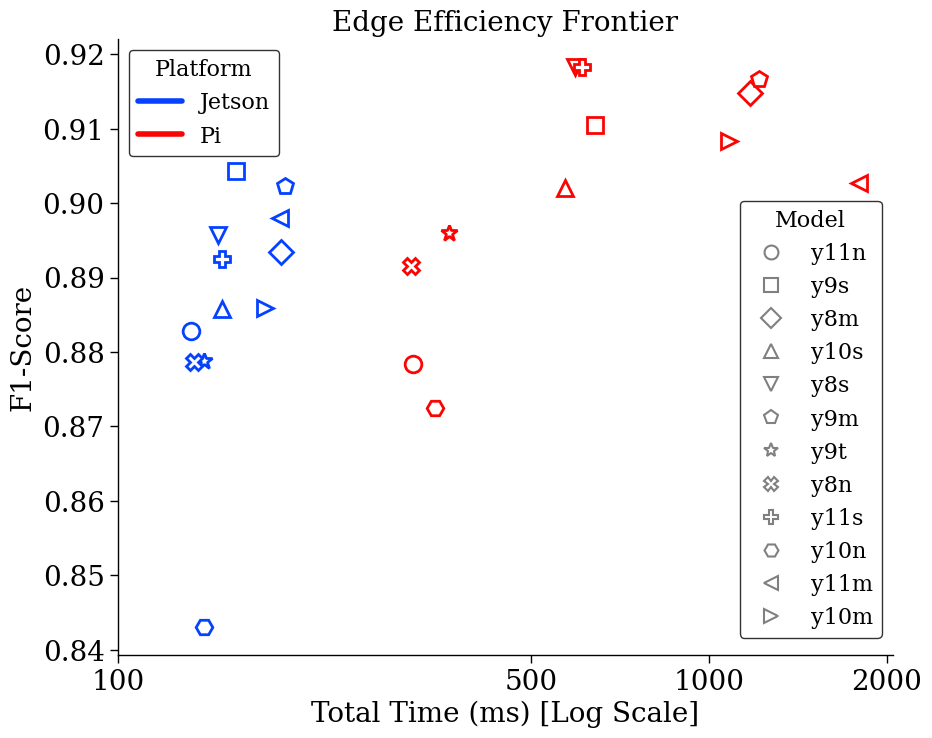

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import warnings
from matplotlib import ticker
from matplotlib.lines import Line2D


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

def plot_efficiency_frontier_vertical_legend(jetson_csv_path: str, pi_csv_path: str):
    """
    Loads Jetson and Pi CSVs, and plots them on the same figure
    with a single vertical legend for the models.

    Args:
        jetson_csv_path (str): The file path to the Jetson evaluation CSV.
        pi_csv_path (str): The file path to the Pi evaluation CSV.
    """
    # --- 1. Style Configuration ---
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif'],
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 16,
        'legend.title_fontsize': 16,
        'figure.figsize': (10, 8),
        'axes.edgecolor': 'black',
        'axes.linewidth': 1.0,
        'xtick.color': 'black',
        'ytick.color': 'black',
        'text.color': 'black',
        'axes.labelcolor': 'black',
    })

    # --- 2. Data Loading ---
    df_jetson = pd.read_csv(jetson_csv_path)
    df_pi = pd.read_csv(pi_csv_path)
    print("✅ Successfully loaded user-provided CSV files into separate dataframes.")

    # Calculate total_time for each dataframe
    time_cols = ['preprocessing_time', 'inference_time', 'postprocessng_time']
    df_jetson['total_time'] = df_jetson[time_cols].sum(axis=1)
    df_pi['total_time'] = df_pi[time_cols].sum(axis=1)

    # --- 3. Plotting ---
    fig, ax = plt.subplots(figsize=(10, 8))
    models = df_jetson['model'].unique()
    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', 'P', 'H', '<', '>']
    model_to_marker = {model: marker for model, marker in zip(models, markers)}
    device_colors = {'Jetson': "#0442FF", 'Pi': "#FA0404"}

    for model in models:
        marker = model_to_marker[model]
        jetson_row = df_jetson[df_jetson['model'] == model]
        if not jetson_row.empty:
            # CHANGE: Increased marker edge width for better contrast
            ax.plot(jetson_row['total_time'], jetson_row['f1_score'], linestyle='None', marker=marker, color=device_colors['Jetson'], mfc='white', mew=2.0, markersize=12)
        pi_row = df_pi[df_pi['model'] == model]
        if not pi_row.empty:
            # CHANGE: Increased marker edge width for better contrast
            ax.plot(pi_row['total_time'], pi_row['f1_score'], linestyle='None', marker=marker, color=device_colors['Pi'], mfc='white', mew=2.0, markersize=12)

    # --- 4. Formatting & Legends ---
    ax.set_title("Edge Efficiency Frontier")
    ax.set_xlabel("Total Time (ms) [Log Scale]")
    ax.set_ylabel("F1-Score")
    ax.set_xscale('log')

    ax.grid(False)
    ax.set_xticks([100, 500, 1000, 2000])
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', direction='out', length=6, width=1)
    plt.setp(ax.get_xticklabels(minor=True), rotation=0, ha='right')

    device_legend_elements = [Line2D([0], [0], color=color, lw=4, label=device) for device, color in device_colors.items()]
    device_legend = ax.legend(handles=device_legend_elements, title="Platform", loc='upper left', frameon=True)
    ax.add_artist(device_legend)

    model_legend_elements = [Line2D([0], [0], marker=marker, color='grey', label=model, linestyle='None', markersize=10, markerfacecolor='white', markeredgewidth=1.5) for model, marker in model_to_marker.items()]
    ax.legend(handles=model_legend_elements, title="Model", loc='lower right', bbox_to_anchor=(1, 0.01), frameon=True)

    # CHANGE: Save as PDF for high-quality vector output
    plt.savefig("efficiency_frontier_final.pdf", bbox_inches='tight')
    plt.show()


# --- Call the function with your file paths ---
jetson_file = "./jetson_cuda_eval.csv"
pi_file = "./pi5_eval.csv"

try:
    plot_efficiency_frontier_vertical_legend(jetson_csv_path=jetson_file, pi_csv_path=pi_file)
except FileNotFoundError:
    print("\n🚨 Error: CSV files not found. Please upload your data files and run again.")